In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
from operator import itemgetter
from loguru import logger
from logger_utils import custom_sink
logger.remove()
logger.add(custom_sink)
functionLogger = logger.bind(format="function_inputs")
%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent
X, Y = load_planar_dataset()

In [2]:
def layer_sizes(X, Y):

    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [3]:
def initialize_parameters(n_x, n_h, n_y):

    W1 = np.random.randn(n_h, n_x) * 0.01 # weight matrix of shape (n_h, n_x)
    b1 = np.zeros((n_h, 1)) # bias vector of shape (n_h, 1)
    W2 = np.random.randn(n_y, n_h) * 0.01 # W2 -- weight matrix of shape (n_y, n_h)
    b2 = np.zeros((n_y, 1)) # bias vector of shape (n_y, 1)

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [4]:
def forward_propagation(X, parameters):

    W1, b1, W2, b2 = itemgetter('W1', 'b1', 'W2', 'b2')(parameters)

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    functionLogger.bind(Z1=Z1, A1=A1, Z2=Z2, A2=A2).debug("----Following calculated in Forward Propagation:")
    assert(A2.shape == (1, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [5]:
def compute_cost(A2, Y, parameters):

    
    m = Y.shape[1] # number of example
    cost = -np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2))/m
    functionLogger.bind(cost=cost).debug("-----Following cost is calculated:")
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    functionLogger.bind(cost=cost).debug("-----Following cost is squeezed:")
    assert(isinstance(cost, float))
    
    return cost

In [6]:
def backward_propagation(parameters, cache, X, Y):

    m = X.shape[1]

    W1 = parameters["W1"]
    W2 = parameters["W2"]


    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m
    functionLogger.bind(dZ2=dZ2,dW2=dW2,db2=db2,dZ1=dZ1,dW1=dW1,db1=db1).debug("Following calculated in Backward_prop:")

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [7]:
def update_parameters(parameters, grads, learning_rate):

    W1, b1, W2, b2 = itemgetter("W1", "b1", "W2", "b2")(parameters)

    dW1, db1, dW2, db2 = itemgetter("dW1", "db1", 'dW2', 'db2')(grads)

    W1 -= learning_rate*dW1
    b1 -= learning_rate*db1
    W2 -= learning_rate*dW2
    b2 -= learning_rate*db2

    functionLogger.bind(W1=W1,b1=b1,W2=W2,b2=b2).debug("Updating Parameters to:")

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [8]:
def nn_model(X, Y, n_h, learning_rate, num_iterations = 10000, print_cost=False):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    functionLogger.debug("Initializing parameters with: n_x: {} n_h: {}, n_y: {}",n_x, n_h, n_y)
    functionLogger.bind(W1=parameters['W1'], b1=parameters['b1'],W2=parameters['W2'],b2=parameters['b2']).debug("---The following params initialized to:")
    
    for i in range(0, num_iterations):
        logger.debug("Entering cycle {} of training\n", i)
        A2, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A2, Y, parameters)

        grads = backward_propagation(parameters, cache, X, Y)

        parameters = update_parameters(parameters, grads, learning_rate)
        logger.debug("Ended cycle {} of training\n", i)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    W1, b1, W2, b2 = itemgetter("W1", "b1", "W2", "b2")(parameters)
    functionLogger.bind(W1=W1,b1=b1,W2=W2,b2=b2).debug("TRAINING COMPLETED, THE GOLDEN PARAMETERS FOUND ARE:")
        
    return parameters


In [9]:
def predict(parameters, X):

    A2, _ = forward_propagation(X, parameters)
    predictions = (A2 >= 0.5)
    
    return predictions

Cost after iteration 0: 0.693189
Cost after iteration 1000: 0.276335
Cost after iteration 2000: 0.261991
Cost after iteration 3000: 0.254170
Cost after iteration 4000: 0.251262
Cost after iteration 5000: 0.225746
Cost after iteration 6000: 0.219310
Cost after iteration 7000: 0.216530
Cost after iteration 8000: 0.214702
Cost after iteration 9000: 0.213386


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

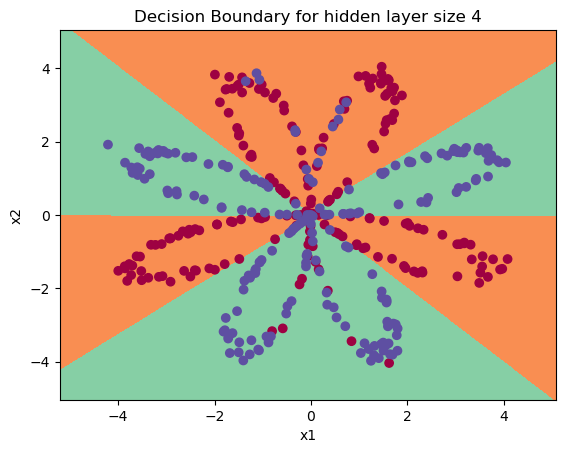

In [10]:
logger.disable("__main__")
parameters = nn_model(X, Y, 5, 1.22 , num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))